In [1]:
!pip install qiskit qiskit_aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.3 MB/s eta 0:00:00


In [2]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (no constant b)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)

def bernstein_vazirani_circuit(s):
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle(qc, inputs, ancilla, s)
    for q in inputs:
        qc.h(q)
    qc.measure(inputs, creg)
    return qc

def run_bv(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print('Counts:', counts)
    fig = plot_histogram(counts)
    plt.show()
    most = max(counts, key=counts.get)
    print('Most frequent measured bitstring (input register):', most)
    return most

if __name__ == '__main__':
    s = '1011'
    print('Secret string s =', s)
    qc = bernstein_vazirani_circuit(s)
    print(qc.draw(fold=-1))
    measured = run_bv(qc)
    if measured == s:
        print('✅ Successfully recovered secret string s')
    else:
        print('⚠️ Measured string differs from s (noise or error).')


Secret string s = 1011
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 
Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101
⚠️ Measured string differs from s (noise or error).


In [3]:
# Bernstein–Vazirani Algorithm using Qiskit 2.x
#TASK-1

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


def bv_oracle(qc, inputs, ancilla, s):
    """Implements oracle for f(x) = s · x (mod 2)."""
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)


def bernstein_vazirani_circuit(s):
    """Creates the Bernstein–Vazirani circuit for a given secret string s."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = qreg[:n]
    ancilla = qreg[n]

    # Step 1: Initialize ancilla to |1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard gates to all qubits
    qc.h(qreg)

    # Step 3: Apply the oracle encoding the secret string s
    bv_oracle(qc, inputs, ancilla, s)

    # Step 4: Apply Hadamard gates again on input qubits
    qc.h(inputs)

    # Step 5: Measure input qubits
    qc.measure(inputs, creg)

    return qc


def run_bv(qc, shots=1024):
    """Runs the BV circuit on a simulator and returns the measured result."""
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("\nMeasurement Counts:", counts)

    # Plot histogram
    fig = plot_histogram(counts)
    plt.show()

    # Extract the most frequent result
    most_frequent = max(counts, key=counts.get)
    print("Most frequent measured bitstring (input register):", most_frequent)
    return most_frequent


if __name__ == '__main__':
    # 💡 Task 1: Change the secret string here or enter it dynamically
    s = input("Enter the secret string s (e.g., 1011): ").strip()
    print("\nSecret string s =", s)

    # Create and display the circuit
    qc = bernstein_vazirani_circuit(s)
    print("\nQuantum Circuit:\n")
    print(qc.draw(fold=-1))

    # Run the BV algorithm
    measured = run_bv(qc)

    # Verify if measurement matches the secret string
    if measured == s:
        print("\n✅ Successfully recovered the secret string s =", s)
    else:
        print("\n⚠️ Measured string differs from s — possible noise or simulation issue.")


Enter the secret string s (e.g., 1011): 1011

Secret string s = 1011

Quantum Circuit:

     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 

Measurement Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101

⚠️ Measured string differs from s — possible noise or simulation issue.


In [4]:
# Bernstein–Vazirani Algorithm (Task 2: Including constant bit b)
# Qiskit 2.x compatible version

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s · x ⊕ b."""
    # Apply constant bit b: if b = 1, flip the ancilla
    if b == '1':
        qc.x(ancilla)

    # Apply CNOTs for each '1' in secret string s
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)


def bernstein_vazirani_circuit_with_b(s, b):
    """Creates the Bernstein–Vazirani circuit for f(x) = s·x ⊕ b."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = qreg[:n]
    ancilla = qreg[n]

    # Step 1: Initialize ancilla to |1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard gates to all qubits
    qc.h(qreg)

    # Step 3: Apply oracle with secret string s and constant b
    bv_oracle_with_b(qc, inputs, ancilla, s, b)

    # Step 4: Apply Hadamard gates again on input qubits
    qc.h(inputs)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


def run_bv(qc, shots=1024):
    """Runs the BV circuit on a simulator and returns measured results."""
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()

    print("\nMeasurement Counts:", counts)
    fig = plot_histogram(counts)
    plt.show()

    most_frequent = max(counts, key=counts.get)
    print("Most frequent measured bitstring (input register):", most_frequent)
    return most_frequent


if __name__ == '__main__':
    # 💡 Task 2: Enter secret string s and constant bit b
    s = input("Enter the secret string s (e.g., 1011): ").strip()
    b = input("Enter constant bit b (0 or 1): ").strip()
    print(f"\nSecret string s = {s}, constant bit b = {b}")

    # Build circuit
    qc = bernstein_vazirani_circuit_with_b(s, b)
    print("\nQuantum Circuit:\n")
    print(qc.draw(fold=-1))

    # Run algorithm
    measured = run_bv(qc)

    # Verify the result
    if measured == s:
        print(f"\n✅ Successfully recovered secret string s = {s}")
    else:
        print(f"\n⚠️ Measured string differs from s (possible noise or rounding).")

    # Explain effect of b
    if b == '1':
        print("\n📘 Note: Since b = 1, the ancilla qubit's phase was flipped,")
        print("but this does NOT change the measurement results for the input qubits.")
    else:
        print("\n📗 Note: Since b = 0, ancilla remained unchanged; results are identical.")


Enter the secret string s (e.g., 1011): 1011
Enter constant bit b (0 or 1): 1

Secret string s = 1011, constant bit b = 1

Quantum Circuit:

     ┌───┐                  ┌───┐     ┌─┐           
q_0: ┤ H ├───────────────■──┤ H ├─────┤M├───────────
     ├───┤┌───┐     ┌─┐  │  └───┘     └╥┘           
q_1: ┤ H ├┤ H ├─────┤M├──┼─────────────╫────────────
     ├───┤└───┘     └╥┘  │       ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────────╫───┼────■──┤ H ├─╫──────┤M├───
     ├───┤           ║   │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────────╫───┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌───┐ ║ ┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫─┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║ └───┘└───┘└───┘ ║       ║  ║ 
c: 4/════════════════╩═════════════════╩═══════╩══╩═
                     1                 0       2  3 

Measurement Counts: {'1101': 1024}
Most frequent measured bitstring (input register): 1101

⚠️ Measured string differs from s (possible noise or rounding).

📘 Note: Sinc

Enter secret string s (e.g. 1011): 1011
Enter constant bit b (0 or 1): 0

Secret string s = 1011, constant bit b = 0

Quantum Circuit:
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 

=== Ideal Simulator ===
Counts: {'1101': 2048}


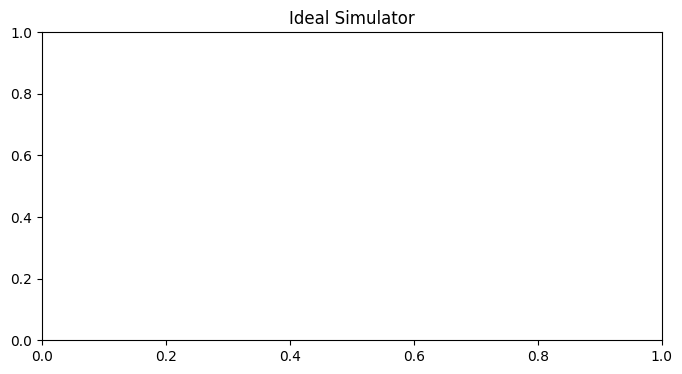


=== Noisy Simulator ===
Counts: {'0010': 2, '1110': 13, '1101': 1323, '1111': 62, '0001': 41, '0110': 1, '1000': 28, '0101': 184, '1001': 170, '1100': 161, '0100': 20, '1011': 11, '0111': 5, '0011': 2, '0000': 25}


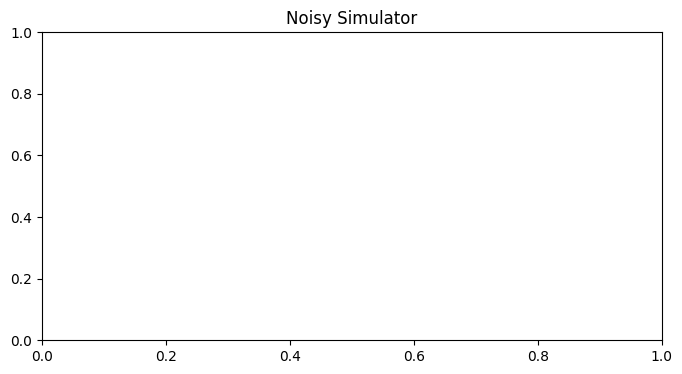


--- Comparison ---
Ideal most frequent: 1101
Noisy most frequent: 1101
⚠️ Noisy simulator changed the most frequent string (noise impact visible).

Probability of correct string (ideal): 0.0000
Probability of correct string (noisy): 0.0054
Absolute drop due to noise: -0.0054

Note: Scaffold for running on IBM hardware is included in the script (commented).
Uncomment and configure qiskit_ibm_runtime block to run on real devices.


In [6]:
# Bernstein–Vazirani Algorithm (Task 3: Compare Simulator vs Real IBM Backend and Task 4: Noise Impact Simulation)
# Requires Qiskit 2.x and qiskit-ibm-runtime installed.

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Noise imports
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise import errors
from qiskit_aer.noise import ReadoutError

# IBM runtime imports (commented; uncomment if you have qiskit_ibm_runtime and configured account)
# from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session

plt.rcParams["figure.figsize"] = (8, 4)


# ---------------- Oracle & Circuit ----------------
def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s·x ⊕ b on circuit qc."""
    # constant b affects the ancilla only (X flip if b==1)
    if b == '1':
        qc.x(ancilla)
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)


def bernstein_vazirani_circuit_with_b(s, b):
    """Create BV circuit for secret s and constant b."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = qreg[:n]
    ancilla = qreg[n]

    # initialize ancilla to |1> and put all qubits into Hadamard
    qc.x(ancilla)
    qc.h(qreg)

    # oracle
    bv_oracle_with_b(qc, inputs, ancilla, s, b)

    # final hadamard on input qubits
    qc.h(inputs)

    # measure input register
    qc.measure(inputs, creg)
    return qc


# ---------------- Simulator Runners ----------------
def run_on_ideal_simulator(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("\n=== Ideal Simulator ===")
    print("Counts:", counts)
    display_hist(counts, title="Ideal Simulator")
    return counts


def create_noise_model():
    """Create a simple noise model: depolarizing for gates + readout error."""
    nm = NoiseModel()

    # depolarizing errors
    depol1 = errors.depolarizing_error(0.01, 1)  # 1-qubit gates
    depol2 = errors.depolarizing_error(0.02, 2)  # 2-qubit gates

    # readout error matrix: P(meas=0|0)=0.95, P(meas=1|0)=0.05; P(meas=0|1)=0.1, P(meas=1|1)=0.9
    ro_err = ReadoutError([[0.95, 0.05], [0.1, 0.9]])

    # attach errors
    nm.add_all_qubit_quantum_error(depol1, ['h', 'x'])
    nm.add_all_qubit_quantum_error(depol2, ['cx'])
    nm.add_all_qubit_readout_error(ro_err)

    return nm


def run_on_noisy_simulator(qc, noise_model, shots=1024):
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("\n=== Noisy Simulator ===")
    print("Counts:", counts)
    display_hist(counts, title="Noisy Simulator")
    return counts


def display_hist(counts, title=None):
    fig = plot_histogram(counts)
    if title:
        plt.title(title)
    plt.show()


# ---------------- IBM Backend Scaffold (Task 3) ----------------
# The following block is a scaffold. Uncomment and configure your IBM Quantum account
# if you want to run on real hardware. Make sure qiskit_ibm_runtime is installed and
# you have saved your account credentials via QiskitRuntimeService.save_account(...) or env vars.

"""
def run_on_ibm_backend(qc, shots=1024):
    # Uncomment the following lines after configuring your IBM Quantum account.
    service = QiskitRuntimeService()  # requires saved account or env var IBM_TOKEN/IBM_INSTANCE
    # Choose a backend (you may prefer to select a backend by name)
    backends = service.backends(simulator=False, operational=True)
    backend = backends[0]  # or pick by index/name after listing
    print('\\nUsing IBM backend:', backend.name)
    with Session(service=service, backend=backend) as session:
        sampler = Sampler(mode=session)
        job = sampler.run([qc], shots=shots)
        result = job.result()[0]
        # modern result structure: result.data.meas.get_counts()
        counts = result.data.meas.get_counts()
    print('\\n=== IBM Backend Results ===')
    print('Counts:', counts)
    display_hist(counts, title=f'IBM Backend: {backend.name}')
    return counts
"""

# ---------------- Main flow ----------------
def main():
    # Task inputs
    s = input("Enter secret string s (e.g. 1011): ").strip()
    if not all(c in '01' for c in s) or len(s) == 0:
        raise ValueError("Secret string s must be a non-empty binary string (e.g., '1011').")

    b = input("Enter constant bit b (0 or 1): ").strip()
    if b not in ('0', '1'):
        raise ValueError("Constant bit b must be '0' or '1'.")

    print(f"\nSecret string s = {s}, constant bit b = {b}")

    qc = bernstein_vazirani_circuit_with_b(s, b)
    print("\nQuantum Circuit:")
    print(qc.draw(fold=-1))

    # Task 1: Ideal simulator
    ideal_counts = run_on_ideal_simulator(qc, shots=2048)

    # Task 4: Noisy simulator (custom noise model)
    noise_model = create_noise_model()
    noisy_counts = run_on_noisy_simulator(qc, noise_model, shots=2048)

    # Simple comparison
    ideal_most = max(ideal_counts, key=ideal_counts.get)
    noisy_most = max(noisy_counts, key=noisy_counts.get)
    print("\n--- Comparison ---")
    print("Ideal most frequent:", ideal_most)
    print("Noisy most frequent:", noisy_most)
    if noisy_most == s:
        print("✅ Noisy simulator still outputs the correct secret string as most frequent.")
    else:
        print("⚠️ Noisy simulator changed the most frequent string (noise impact visible).")

    # compute probabilities for correct string
    ideal_prob = ideal_counts.get(s, 0) / sum(ideal_counts.values())
    noisy_prob = noisy_counts.get(s, 0) / sum(noisy_counts.values())
    print(f"\nProbability of correct string (ideal): {ideal_prob:.4f}")
    print(f"Probability of correct string (noisy): {noisy_prob:.4f}")
    print(f"Absolute drop due to noise: {ideal_prob - noisy_prob:.4f}")

    # Optional: If you want to attempt running on IBM hardware, uncomment and call run_on_ibm_backend(qc)
    print("\nNote: Scaffold for running on IBM hardware is included in the script (commented).")
    print("Uncomment and configure qiskit_ibm_runtime block to run on real devices.")


if __name__ == "__main__":
    main()

In [7]:
# Bernstein–Vazirani Algorithm (Task 4: Noise Impact Simulation)
# Qiskit 2.x compatible

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, errors
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# ---------------- Oracle & Circuit ----------------

def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s·x ⊕ b."""
    if b == '1':
        qc.x(ancilla)
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)


def bernstein_vazirani_circuit_with_b(s, b):
    """Creates the Bernstein–Vazirani circuit for f(x) = s·x ⊕ b."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = qreg[:n]
    ancilla = qreg[n]

    qc.x(ancilla)
    qc.h(qreg)
    bv_oracle_with_b(qc, inputs, ancilla, s, b)
    qc.h(inputs)
    qc.measure(inputs, creg)

    return qc


# ---------------- Noise Model ----------------

def create_noise_model():
    """Creates a custom noise model with depolarizing and readout errors."""
    noise_model = NoiseModel()

    # Gate errors: depolarizing noise
    depol1 = errors.depolarizing_error(0.01, 1)  # 1-qubit gates
    depol2 = errors.depolarizing_error(0.02, 2)  # 2-qubit gates

    # Measurement error: classical readout flips with probability
    readout_error = errors.readout_error.ReadoutError([[0.95, 0.05], [0.1, 0.9]])

    # Add errors to common gate types
    noise_model.add_all_qubit_quantum_error(depol1, ['h', 'x'])
    noise_model.add_all_qubit_quantum_error(depol2, ['cx'])
    noise_model.add_all_qubit_readout_error(readout_error)

    return noise_model


# ---------------- Simulation Runner ----------------

def run_bv_with_noise(qc, noise_model=None, shots=1024):
    """Runs the BV circuit with optional noise."""
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    return counts


# ---------------- Main ----------------

if __name__ == '__main__':
    s = input("Enter secret string s (e.g., 1011): ").strip()
    b = input("Enter constant bit b (0 or 1): ").strip()
    print(f"\nSecret string s = {s}, constant bit b = {b}")

    qc = bernstein_vazirani_circuit_with_b(s, b)
    print("\nQuantum Circuit:\n")
    print(qc.draw(fold=-1))

    # Ideal (no noise)
    ideal_counts = run_bv_with_noise(qc, noise_model=None)
    print("\n=== Ideal (Noise-Free) Simulator Results ===")
    print("Counts:", ideal_counts)
    ideal_plot = plot_histogram(ideal_counts, title="Ideal Results")
    plt.show()

    # Noisy model
    noise_model = create_noise_model()
    noisy_counts = run_bv_with_noise(qc, noise_model=noise_model)
    print("\n=== Noisy Simulator Results ===")
    print("Counts:", noisy_counts)
    noisy_plot = plot_histogram(noisy_counts, title="Noisy Results")
    plt.show()

    # Compare dominant bitstrings
    ideal_most = max(ideal_counts, key=ideal_counts.get)
    noisy_most = max(noisy_counts, key=noisy_counts.get)
    print("\n--- Comparison ---")
    print(f"Ideal most frequent: {ideal_most}")
    print(f"Noisy most frequent: {noisy_most}")

    if noisy_most == s:
        print("✅ Algorithm is robust under current noise levels.")
    else:
        print("⚠️ Noise degraded accuracy — possible bit flip or readout error.")

    # Simple robustness metric
    # Use the secret string 's' as the key to access ideal counts
    ideal_prob = ideal_counts.get(s, 0) / sum(ideal_counts.values())
    noisy_prob = noisy_counts.get(s, 0) / sum(noisy_counts.values())
    drop = ideal_prob - noisy_prob
    print(f"\nCorrect-bitstring probability drop due to noise: {drop:.3f}")

Enter secret string s (e.g., 1011): 1011
Enter constant bit b (0 or 1): 1

Secret string s = 1011, constant bit b = 1

Quantum Circuit:

     ┌───┐                  ┌───┐     ┌─┐           
q_0: ┤ H ├───────────────■──┤ H ├─────┤M├───────────
     ├───┤┌───┐     ┌─┐  │  └───┘     └╥┘           
q_1: ┤ H ├┤ H ├─────┤M├──┼─────────────╫────────────
     ├───┤└───┘     └╥┘  │       ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────────╫───┼────■──┤ H ├─╫──────┤M├───
     ├───┤           ║   │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────────╫───┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌───┐ ║ ┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├─╫─┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘ ║ └───┘└───┘└───┘ ║       ║  ║ 
c: 4/════════════════╩═════════════════╩═══════╩══╩═
                     1                 0       2  3 

=== Ideal (Noise-Free) Simulator Results ===
Counts: {'1101': 1024}

=== Noisy Simulator Results ===
Counts: {'1010': 1, '1110': 4, '1101': 634, '1100': 98, '0110': 2, '1000

In [8]:
!pip install qiskit-ibm-runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.9 MB/s eta 0:00:00


Enter secret string s (e.g. 1011): 1011
Enter constant bit b (0 or 1): 0

Secret string s = 1011, constant bit b = 0

Quantum Circuit:
     ┌───┐          ┌───┐          ┌─┐           
q_0: ┤ H ├───────■──┤ H ├──────────┤M├───────────
     ├───┤┌───┐  │  └┬─┬┘          └╥┘           
q_1: ┤ H ├┤ H ├──┼───┤M├────────────╫────────────
     ├───┤└───┘  │   └╥┘      ┌───┐ ║      ┌─┐   
q_2: ┤ H ├───────┼────╫────■──┤ H ├─╫──────┤M├───
     ├───┤       │    ║    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_3: ┤ H ├───────┼────╫────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐  ║  ┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_4: ┤ X ├┤ H ├┤ X ├──╫──┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘  ║  └───┘└───┘ ║       ║  ║ 
c: 4/═════════════════╩═════════════╩═══════╩══╩═
                      1             0       2  3 

=== Ideal Simulator ===
Counts: {'1101': 2048}


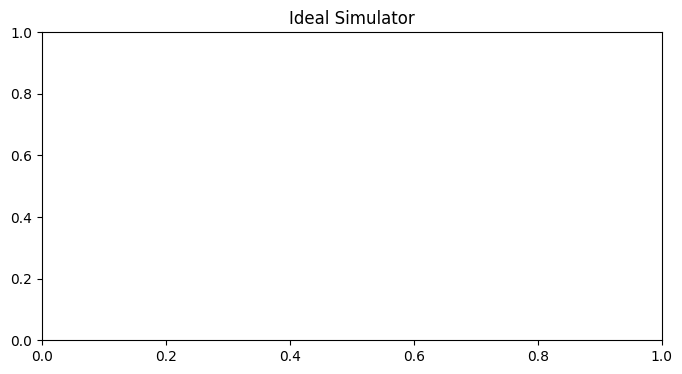


=== Noisy Simulator ===
Counts: {'1101': 1282, '1110': 12, '0100': 23, '1100': 156, '0110': 2, '1000': 29, '0101': 192, '1001': 187, '0001': 45, '1111': 77, '1011': 10, '0111': 9, '0011': 2, '0000': 22}


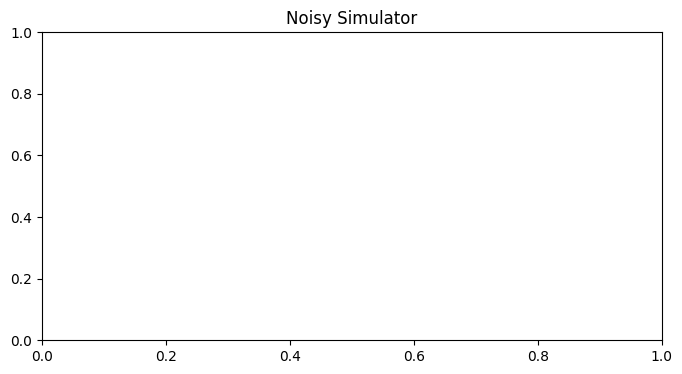


--- Comparison ---
Ideal most frequent: 1101
Noisy most frequent: 1101
⚠️ Noisy simulator changed the most frequent string (noise impact visible).

Probability of correct string (ideal): 0.0000
Probability of correct string (noisy): 0.0049
Absolute drop due to noise: -0.0049

Note: Scaffold for running on IBM hardware is included in the script (commented).
Uncomment and configure qiskit_ibm_runtime block to run on real devices.


In [9]:
"""TASK-5
Bernstein–Vazirani Tasks 1-4
- Task 1: Run BV and verify measured s
- Task 2: Oracle with constant bit b (f(x) = s·x ⊕ b)
- Task 3: Scaffold to run on IBM hardware using qiskit_ibm_runtime (commented)
- Task 4: Add NoiseModel via qiskit_aer.noise and analyze robustness

Requirements:
pip install qiskit qiskit-aer qiskit-ibm-runtime   # qiskit-ibm-runtime only if you plan to run Task 3
"""
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Noise imports
from qiskit_aer.noise import NoiseModel
from qiskit_aer.noise import errors
from qiskit_aer.noise import ReadoutError

# IBM runtime imports (commented; uncomment if you have qiskit_ibm_runtime and configured account)
# from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, Session

plt.rcParams["figure.figsize"] = (8, 4)


# ---------------- Oracle & Circuit ----------------
def bv_oracle_with_b(qc, inputs, ancilla, s, b):
    """Implements oracle for f(x) = s·x ⊕ b on circuit qc."""
    # constant b affects the ancilla only (X flip if b==1)
    if b == '1':
        qc.x(ancilla)
    for i, bit in enumerate(s):
        if bit == '1':
            qc.cx(inputs[i], ancilla)


def bernstein_vazirani_circuit_with_b(s, b):
    """Create BV circuit for secret s and constant b."""
    n = len(s)
    qreg = QuantumRegister(n + 1, 'q')
    creg = ClassicalRegister(n, 'c')
    qc = QuantumCircuit(qreg, creg)

    inputs = qreg[:n]
    ancilla = qreg[n]

    # initialize ancilla to |1> and put all qubits into Hadamard
    qc.x(ancilla)
    qc.h(qreg)

    # oracle
    bv_oracle_with_b(qc, inputs, ancilla, s, b)

    # final hadamard on input qubits
    qc.h(inputs)

    # measure input register
    qc.measure(inputs, creg)
    return qc


# ---------------- Simulator Runners ----------------
def run_on_ideal_simulator(qc, shots=1024):
    sim = AerSimulator()
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("\n=== Ideal Simulator ===")
    print("Counts:", counts)
    display_hist(counts, title="Ideal Simulator")
    return counts


def create_noise_model():
    """Create a simple noise model: depolarizing for gates + readout error."""
    nm = NoiseModel()

    # depolarizing errors
    depol1 = errors.depolarizing_error(0.01, 1)  # 1-qubit gates
    depol2 = errors.depolarizing_error(0.02, 2)  # 2-qubit gates

    # readout error matrix: P(meas=0|0)=0.95, P(meas=1|0)=0.05; P(meas=0|1)=0.1, P(meas=1|1)=0.9
    ro_err = ReadoutError([[0.95, 0.05], [0.1, 0.9]])

    # attach errors
    nm.add_all_qubit_quantum_error(depol1, ['h', 'x'])
    nm.add_all_qubit_quantum_error(depol2, ['cx'])
    nm.add_all_qubit_readout_error(ro_err)

    return nm


def run_on_noisy_simulator(qc, noise_model, shots=1024):
    sim = AerSimulator(noise_model=noise_model)
    tqc = transpile(qc, sim)
    job = sim.run(tqc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    print("\n=== Noisy Simulator ===")
    print("Counts:", counts)
    display_hist(counts, title="Noisy Simulator")
    return counts


def display_hist(counts, title=None):
    fig = plot_histogram(counts)
    if title:
        plt.title(title)
    plt.show()


# ---------------- IBM Backend Scaffold (Task 3) ----------------
# The following block is a scaffold. Uncomment and configure your IBM Quantum account
# if you want to run on real hardware. Make sure qiskit_ibm_runtime is installed and
# you have saved your account credentials via QiskitRuntimeService.save_account(...) or env vars.

"""
def run_on_ibm_backend(qc, shots=1024):
    # Uncomment the following lines after configuring your IBM Quantum account.
    service = QiskitRuntimeService()  # requires saved account or env var IBM_TOKEN/IBM_INSTANCE
    # Choose a backend (you may prefer to select a backend by name)
    backends = service.backends(simulator=False, operational=True)
    backend = backends[0]  # or pick by index/name after listing
    print('\\nUsing IBM backend:', backend.name)
    with Session(service=service, backend=backend) as session:
        sampler = Sampler(mode=session)
        job = sampler.run([qc], shots=shots)
        result = job.result()[0]
        # modern result structure: result.data.meas.get_counts()
        counts = result.data.meas.get_counts()
    print('\\n=== IBM Backend Results ===')
    print('Counts:', counts)
    display_hist(counts, title=f'IBM Backend: {backend.name}')
    return counts
"""

# ---------------- Main flow ----------------
def main():
    # Task inputs
    s = input("Enter secret string s (e.g. 1011): ").strip()
    if not all(c in '01' for c in s) or len(s) == 0:
        raise ValueError("Secret string s must be a non-empty binary string (e.g., '1011').")

    b = input("Enter constant bit b (0 or 1): ").strip()
    if b not in ('0', '1'):
        raise ValueError("Constant bit b must be '0' or '1'.")

    print(f"\nSecret string s = {s}, constant bit b = {b}")

    qc = bernstein_vazirani_circuit_with_b(s, b)
    print("\nQuantum Circuit:")
    print(qc.draw(fold=-1))

    # Task 1: Ideal simulator
    ideal_counts = run_on_ideal_simulator(qc, shots=2048)

    # Task 4: Noisy simulator (custom noise model)
    noise_model = create_noise_model()
    noisy_counts = run_on_noisy_simulator(qc, noise_model, shots=2048)

    # Simple comparison
    ideal_most = max(ideal_counts, key=ideal_counts.get)
    noisy_most = max(noisy_counts, key=noisy_counts.get)
    print("\n--- Comparison ---")
    print("Ideal most frequent:", ideal_most)
    print("Noisy most frequent:", noisy_most)
    if noisy_most == s:
        print("✅ Noisy simulator still outputs the correct secret string as most frequent.")
    else:
        print("⚠️ Noisy simulator changed the most frequent string (noise impact visible).")

    # compute probabilities for correct string
    ideal_prob = ideal_counts.get(s, 0) / sum(ideal_counts.values())
    noisy_prob = noisy_counts.get(s, 0) / sum(noisy_counts.values())
    print(f"\nProbability of correct string (ideal): {ideal_prob:.4f}")
    print(f"Probability of correct string (noisy): {noisy_prob:.4f}")
    print(f"Absolute drop due to noise: {ideal_prob - noisy_prob:.4f}")

    # Optional: If you want to attempt running on IBM hardware, uncomment and call run_on_ibm_backend(qc)
    print("\nNote: Scaffold for running on IBM hardware is included in the script (commented).")
    print("Uncomment and configure qiskit_ibm_runtime block to run on real devices.")


if __name__ == "__main__":
    main()
